In [2]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(stringr))
suppressPackageStartupMessages(library(patchwork))

library(plyr)
library(ggbeeswarm)
library(rstatix)
library(ggpubr)
library(ggplot2)

In [3]:
df<-read.csv("04_B_cell_flow/Median_Expression_CD19_CD11c_in_CD27neg_effector_B.csv")

In [4]:
df<-df %>% mutate(Flu_Day=case_when(timepoint=="day0"~"Day 0", TRUE~"Day 7"))
df <- df %>% mutate(`Age Group` = case_when(
  group == "BR1" ~ "Young",
  group == "BR2" ~ "Older",
  TRUE ~ NA_character_
))
df$`Age Group`<-factor(df$`Age Group`,levels=c("Young","Older"))

In [5]:
df$Group<-paste0(df$`Age Group`,'_',df$Flu_Day)

In [6]:
df$Group<-factor(df$Group,levels=c('Young_Day 0','Older_Day 0',
                                   'Young_Day 7','Older_Day 7'))

Warning message in geom_point(alpha = 1, size = 0.8, width = 0.3):
“Ignoring unknown parameters: `width`”
Warning message in stat_summary(fun = "median", aes(fill = "Median"), geom = "crossbar", :
“Ignoring unknown parameters: `shape`”


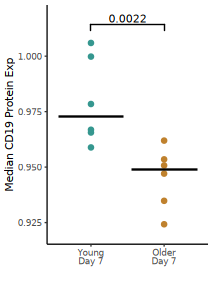

In [9]:
options(repr.plot.width = 45/25.4, repr.plot.height = 60/25.4)

p1<-ggplot(df %>% filter(timepoint %in% c('day7')), aes(Group, meadian_CD19, color=`Age Group`)) + 
geom_point(alpha=1.0, size=0.8, width=0.3) +
stat_summary(fun="median", aes(fill="Median"),geom="crossbar", shape=18, size=0.2, 
           color='black', na.rm=T) + 
theme_classic(base_size=6) +  
stat_compare_means( label = "p.format",method='wilcox.test',paired=FALSE,size=2.2,method.args = list(alternative = "less"),
                   label.y=1.01,
  comparisons = list(c("Older_Day 7", "Young_Day 7")))+
scale_fill_manual(values="black", name="")  + 
scale_x_discrete(labels = c(
                              "Older_Day 7" = "Older\nDay 7",
                              "Young_Day 7" = "Young\nDay 7"))+ 
xlab("") +
scale_color_manual(values = c("Older" = '#bf812d', "Young" = '#35978f'))+
scale_y_continuous(limits = c(NA, NA),
               expand = expansion(mult = c(0.1, 0.1)))+
xlab('')+
ylab('Median CD19 Protein Exp')+theme(
panel.border = element_blank())   +
theme(axis.line = element_line(colour = "black"),
  legend.position = "none",
  legend.title = element_blank(),
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank(),
  panel.border = element_blank(),
  panel.background = element_blank(),
  strip.background = element_rect(linewidth = 0),
  axis.title.x = element_text(margin = margin(t = 1)))+
  theme(plot.title = element_text(hjust = 0.5))
p1
ggsave('FigureH.pdf',
       p1,
       width = 40/25.4,
       height = 30/25.4)